In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
from sklearn.datasets import load_digits

In [7]:
digits_df = load_digits()
dir(digits_df)

['DESCR', 'data', 'images', 'target', 'target_names']

In [10]:
# Lets see the data
digits_df.data[0]
# You can see that the data is in array format

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

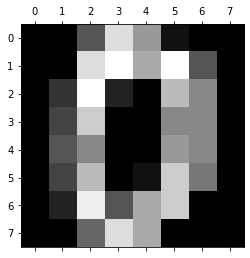

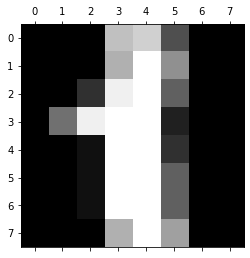

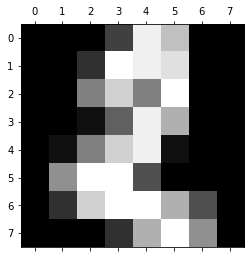

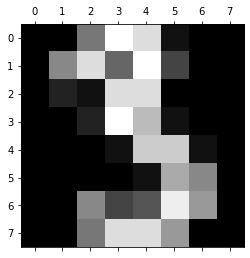

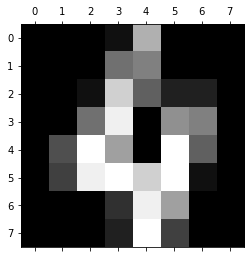

In [14]:
# Lets see the first 5 images in the dataset
for i in range(5):
    plt.gray()
    plt.matshow(digits_df.images[i])

In [19]:
# Let us see the first 5 target values(output) in the dataset
digits_df.target[0:5]

array([0, 1, 2, 3, 4])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_df.data,digits_df.target, test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.predict([digits_df.data[15]])

array([5])

<Figure size 432x288 with 0 Axes>

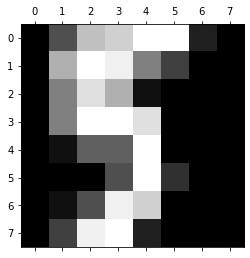

In [29]:
# Lets view the image of the predicted data
plt.gray()
plt.matshow(digits_df.images[15])

In [31]:
# Let the see the actual output value
digits_df.target[15]

5

In [32]:
# The model score
model.score(X_test, y_test)

0.9611111111111111

In [33]:
# Lets see the total confusion matrix
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [34]:
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  1],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 40]], dtype=int64)

Text(69.0, 0.5, 'Actual Value')

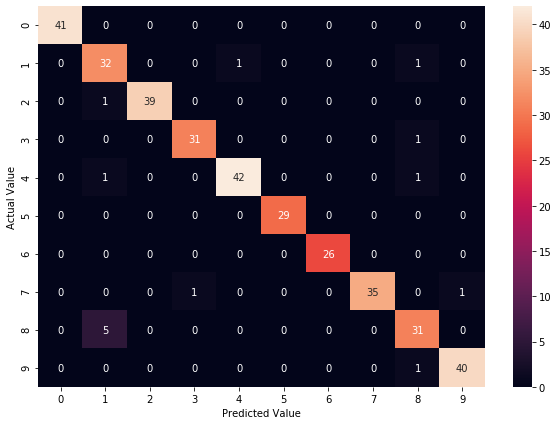

In [36]:
# Lets visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')